#### MNIST PCA

In [4]:
import numpy as np 
import pandas as pd 
import random as rn

# Visualization libraries
import pydotplus
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [33]:
from catboost import CatBoostClassifier
from catboost.utils import get_gpu_device_count

In [6]:
path = './data'

In [8]:
train_df= pd.read_csv(path + '/mnist_train.csv')
test_df= pd.read_csv(path + '/mnist_test.csv')

X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

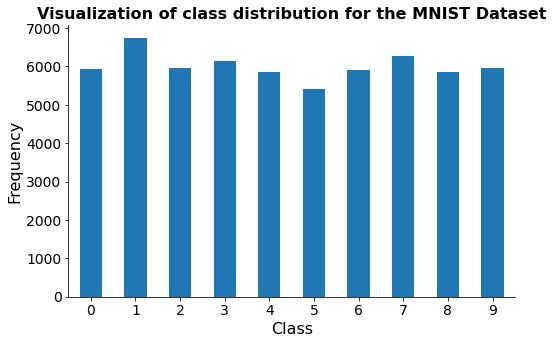

In [9]:


# Visualize target distribution
train_df['label'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
sns.despine()
plt.show()



<ipython-input-10-390457d0b781>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_images/10,10,digit_num+1) #create subplots


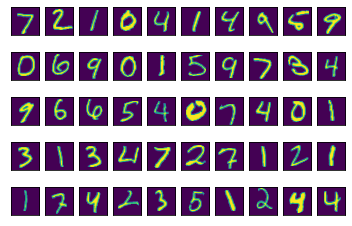

In [10]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X_test.iloc[digit_num].values.reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)


In [11]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y_test == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X_test.iloc[indices[0][digit_num]].values.reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis


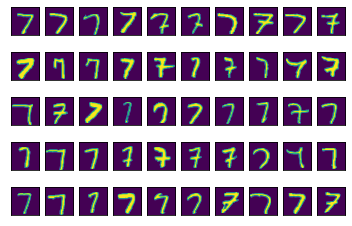

In [12]:
show_images_by_digit(7)

In [13]:
def get_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [38]:
def fit_classifier(X, y, print_conf_matrix_output=True):
    
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, 
                                                        test_size=0.25, 
                                                        random_state=42)

    model = CatBoostClassifier(
        iterations=1500,
        early_stopping_rounds= 30, #overfitting detector
        random_seed=42, 
        task_type="GPU" if get_gpu_device_count() > 0 else "CPU",
    )

    model.fit(X_train_clf,y_train_clf, 
              verbose=50,
              plot=False, 
              eval_set=(X_test_clf, y_test_clf), 
             )

    y_preds = model.predict(X_test_clf)

    acc = accuracy_score(y_test_clf, y_preds)
    
    if print_conf_matrix_output == True:
        
        model.tree_count_
        
        mat = confusion_matrix(y_test_clf, y_preds)
        sns.heatmap(mat, annot=True, linewidths=.5)

        print('Input Shape: {}'.format(X_train_clf.shape))
        print('Accuracy: {:2.2%}\n'.format(acc))
        print(mat)
    
    return model

Learning rate set to 0.129376
0:	learn: 1.9002498	test: 1.9024383	best: 1.9024383 (0)	total: 58.3ms	remaining: 1m 27s
50:	learn: 0.2574768	test: 0.2747078	best: 0.2747078 (50)	total: 2.05s	remaining: 58.3s
100:	learn: 0.1678083	test: 0.1909056	best: 0.1909056 (100)	total: 3.66s	remaining: 50.7s
150:	learn: 0.1463606	test: 0.1718055	best: 0.1718055 (150)	total: 4.97s	remaining: 44.4s
200:	learn: 0.1339521	test: 0.1607462	best: 0.1607462 (200)	total: 6.23s	remaining: 40.3s
250:	learn: 0.1252743	test: 0.1534472	best: 0.1534472 (250)	total: 7.48s	remaining: 37.2s
300:	learn: 0.1187587	test: 0.1486285	best: 0.1486285 (300)	total: 8.74s	remaining: 34.8s
350:	learn: 0.1113881	test: 0.1422550	best: 0.1422550 (350)	total: 10s	remaining: 32.8s
400:	learn: 0.1047297	test: 0.1370844	best: 0.1370844 (400)	total: 11.3s	remaining: 31.1s
450:	learn: 0.0991563	test: 0.1328109	best: 0.1328103 (449)	total: 12.7s	remaining: 29.5s
500:	learn: 0.0946642	test: 0.1291762	best: 0.1291762 (500)	total: 14s	remai

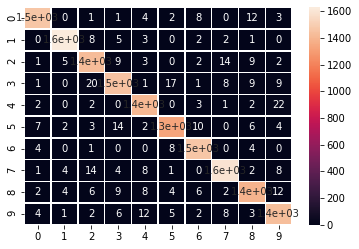

In [40]:
m = fit_classifier(X_train, y_train)

In [41]:
m.score(X_train, y_train)

0.9899333333333333

Linea base son reducción de dimensiones

Learning rate set to 0.129376
0:	learn: 2.1311649	test: 2.1331328	best: 2.1331328 (0)	total: 5.78ms	remaining: 8.66s
50:	learn: 1.6344142	test: 1.6497590	best: 1.6497590 (50)	total: 300ms	remaining: 8.52s
100:	learn: 1.6203382	test: 1.6437501	best: 1.6437501 (100)	total: 556ms	remaining: 7.7s
150:	learn: 1.6117413	test: 1.6423591	best: 1.6423591 (150)	total: 799ms	remaining: 7.14s
bestTest = 1.642313411
bestIteration = 151
Shrink model to first 152 iterations.
Input Shape: (45000, 2)
Accuracy: 36.30%

[[1008    1  263   19   10   30  148    0   16    0]
 [   0 1469    4    3    7   43   14   28   15   66]
 [ 184    4  626  132   89   33  263   29   40   71]
 [  50   20  355  145  139  108  279  122  121  179]
 [  29   69  288  110  152   42  263  126   62  302]
 [  45   26  286   96   80  304  353   13  128   52]
 [ 168   47  387   55   40  194  509    8   64   10]
 [   3  129   72   80  117   41  111  610   65  407]
 [  33   66  214   93  107  237  274   60  197  164]
 [   9  193   98

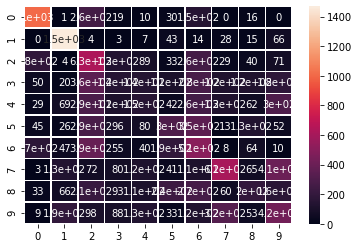

In [20]:
pca, X_pca = get_pca(2, X_train)
fit_classifier(X_pca, y_train);

In [21]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])


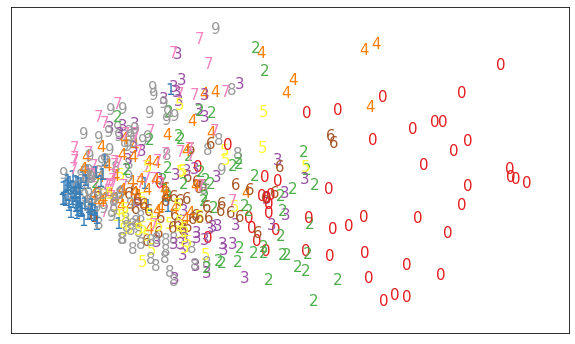

In [22]:
plot_components(X_pca[:500], y_train[:500])

In [43]:
acc_list, pc_list = [], []
for pc in range(2,40):
    pca, X_pca = get_pca(pc, X_train)
    acc = fit_classifier(X_pca, y_train, print_conf_matrix_output=False);
    acc_list.append(acc.score(X_pca, y_train))
    pc_list.append(pc)

Learning rate set to 0.129376
0:	learn: 2.1311642	test: 2.1331497	best: 2.1331497 (0)	total: 7.13ms	remaining: 10.7s
50:	learn: 1.6343677	test: 1.6499342	best: 1.6499342 (50)	total: 307ms	remaining: 8.72s
100:	learn: 1.6201950	test: 1.6438417	best: 1.6438417 (100)	total: 546ms	remaining: 7.56s
150:	learn: 1.6113266	test: 1.6423798	best: 1.6422762 (133)	total: 804ms	remaining: 7.18s
bestTest = 1.642276172
bestIteration = 133
Shrink model to first 134 iterations.
Learning rate set to 0.129376
0:	learn: 2.0239302	test: 2.0271793	best: 2.0271793 (0)	total: 7.24ms	remaining: 10.9s
50:	learn: 1.1486719	test: 1.1679469	best: 1.1679469 (50)	total: 314ms	remaining: 8.93s
100:	learn: 1.1128576	test: 1.1410938	best: 1.1410938 (100)	total: 566ms	remaining: 7.85s
150:	learn: 1.0973208	test: 1.1343697	best: 1.1343697 (150)	total: 816ms	remaining: 7.29s
200:	learn: 1.0862139	test: 1.1319776	best: 1.1319776 (200)	total: 1.08s	remaining: 7.01s
250:	learn: 1.0770862	test: 1.1309745	best: 1.1309745 (250)

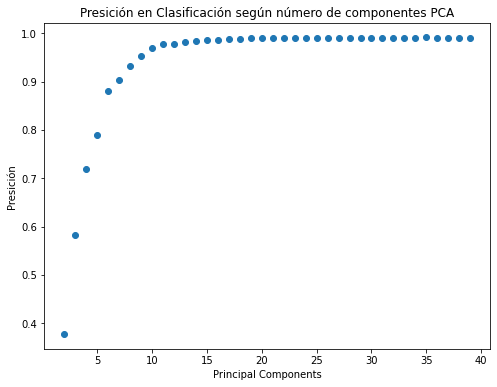

In [44]:
plt.figure(figsize=[8,6])
plt.scatter(pc_list, acc_list)
plt.title('Presición en Clasificación según número de componentes PCA')
plt.xlabel('Principal Components')
plt.ylabel('Presición');

In [45]:
np.max(acc_list), pc_list[np.where(acc_list == np.max(acc_list))[0][0]]

(0.9912833333333333, 35)

In [46]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(16, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

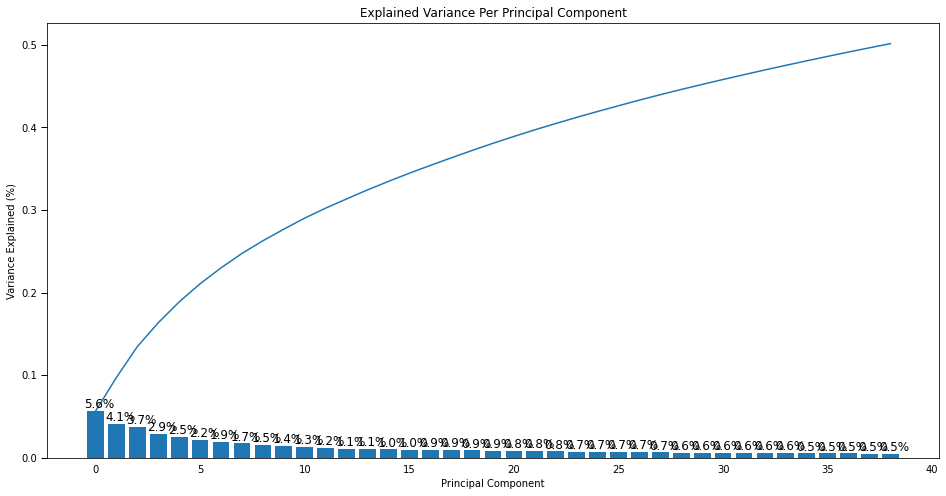

In [47]:
scree_plot(pca)

In [48]:
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   

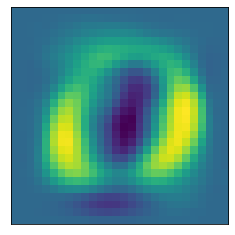

In [49]:
plot_component(pca,0)

In [50]:
pca, X_pca = get_pca(150, X_train)

Learning rate set to 0.129376
0:	learn: 1.8851142	test: 1.8869980	best: 1.8869980 (0)	total: 16.5ms	remaining: 24.8s
50:	learn: 0.3594160	test: 0.3815670	best: 0.3815670 (50)	total: 672ms	remaining: 19.1s
100:	learn: 0.2193331	test: 0.2554178	best: 0.2554178 (100)	total: 1.29s	remaining: 17.9s
150:	learn: 0.1696446	test: 0.2156057	best: 0.2156057 (150)	total: 1.87s	remaining: 16.7s
200:	learn: 0.1386856	test: 0.1922432	best: 0.1922432 (200)	total: 2.45s	remaining: 15.8s
250:	learn: 0.1176394	test: 0.1774914	best: 0.1774914 (250)	total: 3.02s	remaining: 15s
300:	learn: 0.1031772	test: 0.1672701	best: 0.1672701 (300)	total: 3.6s	remaining: 14.3s
350:	learn: 0.0901174	test: 0.1588935	best: 0.1588935 (350)	total: 4.16s	remaining: 13.6s
400:	learn: 0.0808879	test: 0.1528419	best: 0.1528419 (400)	total: 4.73s	remaining: 13s
450:	learn: 0.0722974	test: 0.1470312	best: 0.1470312 (450)	total: 5.31s	remaining: 12.4s
500:	learn: 0.0649108	test: 0.1425681	best: 0.1425681 (500)	total: 5.88s	remaini

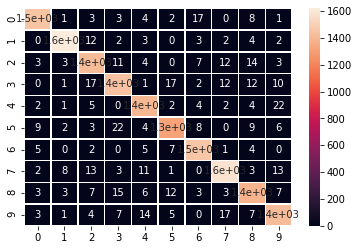

In [51]:
model = fit_classifier(X_pca,y_train )

In [52]:
model.tree_count_

1500

In [53]:
model.get_param('loss_function')

In [57]:
pca_test, X_pca_test = get_pca(150, X_test)

In [58]:
model.predict(X_pca_test)[2]

array([1])

In [59]:
model.predict_proba(X_pca_test)[0]

array([2.88938741e-05, 1.58327982e-05, 7.70505277e-04, 8.17070131e-04,
       4.03290048e-05, 2.42669211e-04, 6.11489882e-06, 9.94587272e-01,
       1.22717511e-03, 2.26413723e-03])